In [1]:
# Global Setup!
isWeighted = False
nTrees     = 1000
maxDepth   = 3

plotVariables = True

version  = "Final"

version += ("_" + str(nTrees) + "_" + str(maxDepth))

print(version)

Final_1000_3


In [6]:
# Add the relevant scripts from LArMachineLearningData
# Nice the process so it can run with lots of cores on low priority
import os

# Add path for LArMachineLearningData
import sys
pandoraMVADir = ""
#dataDir       = "../"
dataDir       = "./"

#sys.path.append(pandoraMVADir + 'LArMachineLearningData/scripts')
sys.path.append(pandoraMVADir + '.')

# Import pandora libraries
from importlib import reload
from PandoraBDT import *

# Import concatenation tool
from itertools import chain

# Import relevant SKLearn libraries
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn import metrics

# Set global params
testTrainFraction = 0.5
nCores = -1

In [7]:
# Data and Name
trainingFile = dataDir + 'training_output.txt'
BDTName = "PfoCharacterisation"

# Directories
plotsDir = pandoraMVADir + 'bdt/plots/' + BDTName + '/' + version + '/'
saveDir  = pandoraMVADir + 'bdt/trained/' + BDTName + '/' + version + '/'
print(plotsDir)
print(saveDir)

if not os.path.exists(plotsDir):
    os.makedirs(plotsDir)
    
if not os.path.exists(saveDir):
    os.makedirs(saveDir)

bdt/plots/PfoCharacterisation/Final_1000_3/
bdt/trained/PfoCharacterisation/Final_1000_3/


In [8]:
# Set background and signal label names
params = {
    'labelNames': ['Shower','Track'],
    'signalDefs': [0, 1],
    'signalCols': ['r', 'b']
}

# Create the base BDT to vary the params from and compare to
baseBDT = AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxDepth),algorithm='SAMME', 
                             random_state=42, n_estimators=nTrees)

In [9]:
# Load the data
data, nFeatures, nExamples = LoadData(trainingFile, ',')

In [10]:
features, labels           = SplitTrainingSet(data, nFeatures)

# Split into train and test samples
xTrain, yTrain, xTest, yTest = Sample(features, labels, testTrainFraction)

# Split into signal and background based on the true labels
signalFeatures = features[labels==1]
backgroundFeatures = features[labels==0]

# Check the features array is the same size as the feature names array
print (len(features[0]))
print (np.shape(features))
print('Total: '+str(len(features))+', signal: '+
      str(len(signalFeatures))+' and background: '+
      str(len(backgroundFeatures)))

13
(45, 13)
Total: 45, signal: 30 and background: 15


In [11]:
# Construct the Pandas dataframe
# First create a dictionary
allDict = {i: features[:, i] for i in range(nFeatures)}
allDict.update({'Labels': labels})

# Create the Pandas dataframe, create seperate df for signal/background
df = pd.DataFrame(data=allDict)

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,Labels
0,87.90370,0.001900,0.016331,0.036573,1.261410,0.000040,1.456150e-05,0.0,0.0,0.0,0.016805,0.458359,0.094218,1
1,126.80200,0.007053,0.028622,0.062976,7.552600,0.000046,1.450050e-05,0.0,0.0,0.0,0.008185,0.231306,0.099429,1
2,13.08330,0.004884,0.111622,0.223643,13.209100,0.000053,2.101410e-05,0.0,0.0,0.0,0.059252,1.131480,0.142706,1
3,85.76840,0.013784,0.180036,1.145030,6.523260,0.018516,4.807110e-03,0.0,0.0,0.0,0.339882,0.682027,0.119319,0
4,165.17100,0.005745,0.006169,0.025656,0.691768,0.003246,1.951550e-04,0.0,0.0,0.0,0.027300,0.241261,0.110848,1
5,0.00000,0.011222,0.416667,0.086939,3.852420,0.000000,0.000000e+00,0.0,0.0,0.0,0.100000,0.106764,0.549064,0
6,6.49532,0.010894,0.159286,0.195873,3.897630,0.138065,4.311090e-03,0.0,0.0,0.0,0.051496,0.526841,0.182526,0
7,99.05360,0.006962,0.011575,0.055159,1.167160,0.008384,2.061580e-05,0.0,0.0,0.0,0.030005,0.675892,0.247475,1
8,7.14576,0.008581,0.135326,0.028703,1.810210,0.000117,6.363020e-06,0.0,0.0,0.0,0.014450,0.245990,0.193277,1
9,86.12120,0.041658,0.150255,0.542630,96.730700,0.054783,4.276710e-03,0.0,0.0,0.0,0.024559,1.070710,0.104825,1


In [13]:
def DrawVariablesDF(df, params, topdir, save=True):
    for column in df:
        if column == 'Labels':
            continue    
        fig, ax = plt.subplots()
        df.pivot(columns='Labels')[column].plot.hist(bins=50, alpha=0.5, color=params['signalCols'], edgecolor='k', density=True, ax=ax)
        ax.legend(params['labelNames']);
        ax.set_xlabel(column)

        plt.tight_layout()
        if save:
            plt.savefig(topdir + 'Feature_' + str(column) + '.png')
            plt.savefig(topdir + 'Feature_' + str(column) + '.pdf')
        plt.show()
        plt.close()

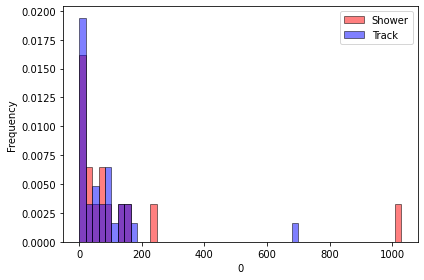

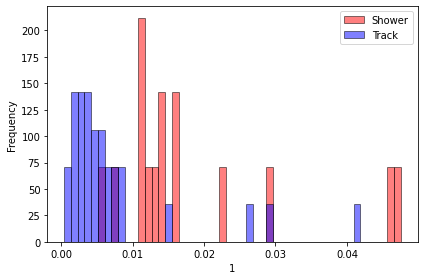

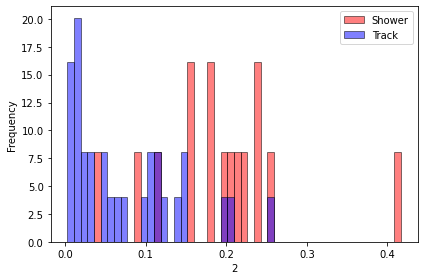

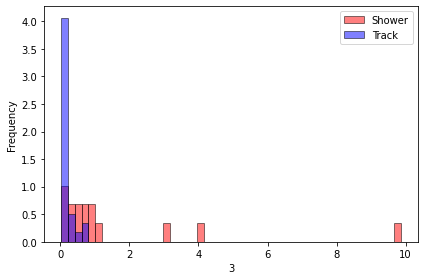

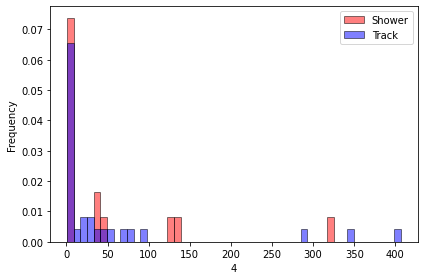

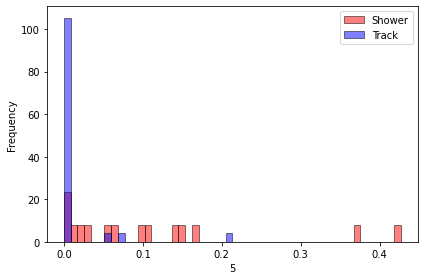

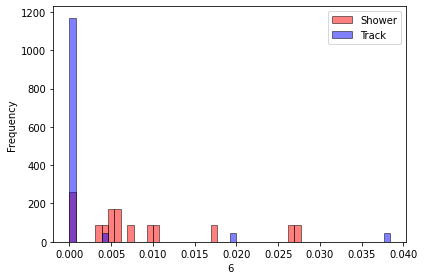

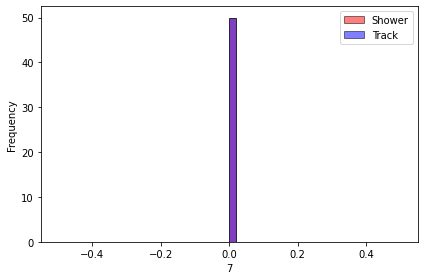

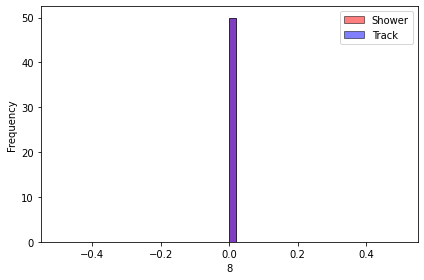

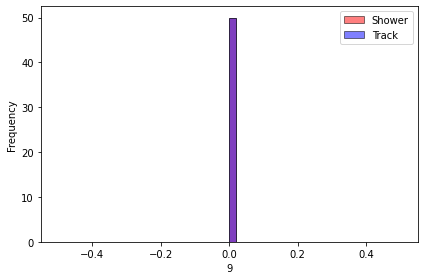

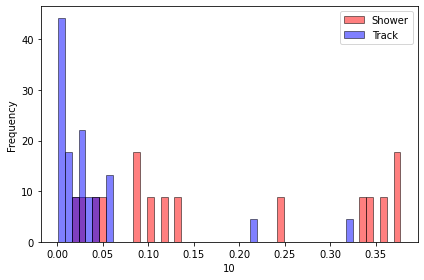

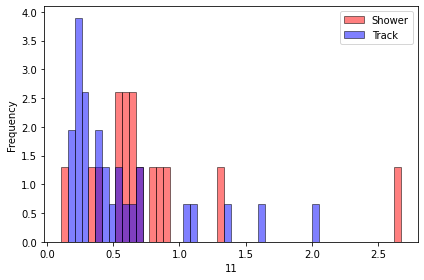

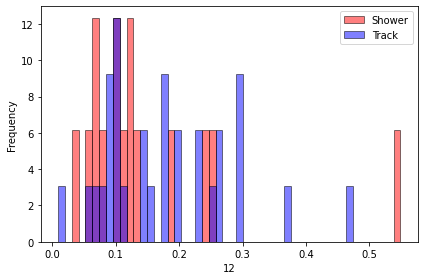

In [14]:
# Make plots drawing the variables for signal/background
if plotVariables : DrawVariablesDF(df, params, plotsDir, save = True)

In [15]:
def Correlation(df, label, topdir, save=False):
    plt.figure(figsize=(10, 10))
    plt.title(label)

    ax = sns.heatmap(df.corr(), cmap='coolwarm', vmax=1.0, vmin=-1.0,
                     annot=True, square=True, fmt='.2g')

    ax.invert_yaxis()

    if save:
        plt.savefig(topdir + '/' + label.replace(" ", "_") + ".png", bbox_inches='tight')
        plt.savefig(topdir + '/' + label.replace(" ", "_") + ".pdf", bbox_inches='tight')
    plt.show()
    plt.close()

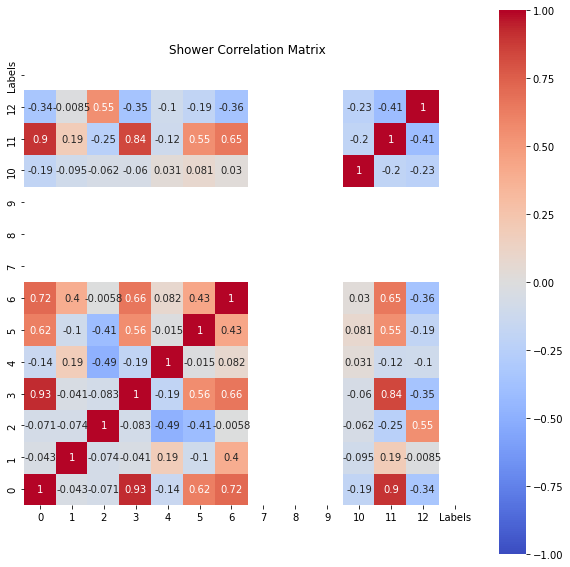

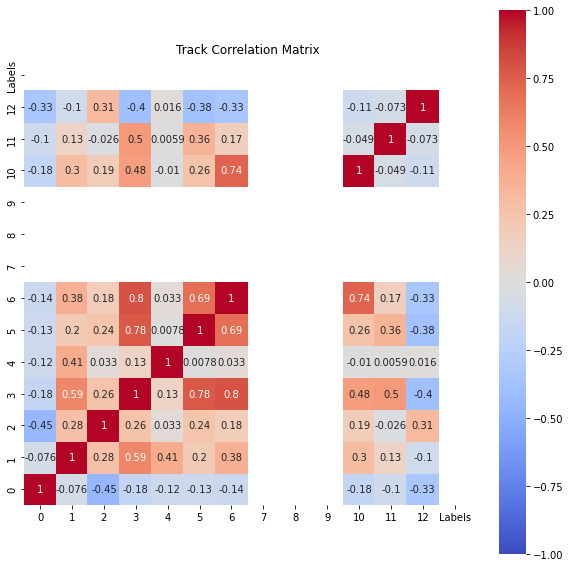

In [16]:
# Make correlation matricies
if plotVariables :
    Correlation(df[df['Labels']==params['signalDefs'][0]], params['labelNames'][0] + ' Correlation Matrix',plotsDir, save = True)
    Correlation(df[df['Labels']==params['signalDefs'][1]], params['labelNames'][1] + ' Correlation Matrix',plotsDir, save = True)

In [17]:
# Reference BDT with controlled hyperparams
baseBDT.fit(xTrain,yTrain)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=1000, random_state=42)

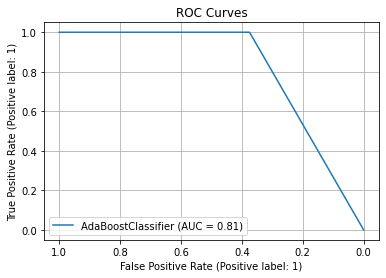

In [18]:
# Plot ROC curves
fig, ax = plt.subplots()
metrics.plot_roc_curve(baseBDT, xTest, yTest, ax=ax)

plt.title("ROC Curves")
ax.invert_xaxis()
ax.legend()
ax.grid()

plt.savefig(plotsDir + '/' + "roc.png", bbox_inches='tight')
plt.savefig(plotsDir + '/' + "roc.pdf", bbox_inches='tight')

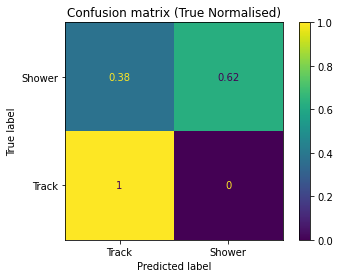

In [19]:
# Plot Confusion Matricies
fig, ax = plt.subplots()
metrics.plot_confusion_matrix(baseBDT, xTest, yTest, display_labels=params['labelNames'],
                             ax=ax, normalize='true')
ax.invert_xaxis()
plt.title("Confusion matrix (True Normalised)")

plt.savefig(plotsDir + '/' + "confusion_matrix.png", bbox_inches='tight')
plt.savefig(plotsDir + '/' + "confusion_matrix.pdf", bbox_inches='tight')
plt.show()

In [20]:
# Print more detailed performance info
bdtPredicted = baseBDT.predict(xTest)

print ("Background (0): ", params['labelNames'][0])
print ("Signal (1): ", params['labelNames'][1])
print ("BDT:\n", metrics.classification_report(yTest, bdtPredicted))

Background (0):  Shower
Signal (1):  Track
BDT:
               precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.83      1.00      0.91        15

    accuracy                           0.87        23
   macro avg       0.92      0.81      0.84        23
weighted avg       0.89      0.87      0.86        23



    Features  Importance Score
0          0          0.000000
3          3          0.000000
4          4          0.000000
5          5          0.000000
6          6          0.000000
7          7          0.000000
8          8          0.000000
9          9          0.000000
10        10          0.000000
11        11          0.000000
12        12          0.000000
1          1          0.183333
2          2          0.816667


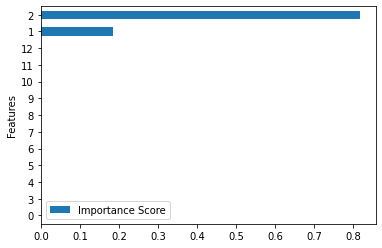

In [21]:
# Plot importance of features
importanceDF = pd.DataFrame({'Features': range(len(features[0])), 'Importance Score':baseBDT.feature_importances_})
print (importanceDF.sort_values(by=['Importance Score']))
ax = importanceDF.sort_values(by=['Importance Score'])\
    .plot(kind='barh', x='Features', y='Importance Score')

plt.savefig(plotsDir + '/' + "feature_importance.png", bbox_inches='tight')

plt.savefig(plotsDir + '/' + "feature_importance.pdf", bbox_inches='tight')

In [22]:
import scipy.stats as sci

def PlotBdtScores2(bdtModel, X_test, Y_test, X_train, Y_train, title, parameters, topDir, save=False):
    # Testing BDT Using Remainder of Training Sample
    test_results = bdtModel.decision_function(X_test)
    train_results = bdtModel.decision_function(X_train)

    test_results_signal = test_results[Y_test == 1]
    train_results_signal = train_results[Y_train == 1]
    test_results_background = test_results[Y_test == 0]
    train_results_background = train_results[Y_train == 0]

    fig, ax = plt.subplots()

    ax.set_title('Overtraining Test: ' + title)

    sigEff = 0
    bkgRej = 0

    for i, n, g in zip(parameters['SignalDefinition'], parameters['ClassNames'], parameters['PlotColors']):
        entries, bins, patches = ax.hist(train_results[Y_train == i],
                                         bins=parameters['nBins'],
                                         range=(-1, 1),
                                         facecolor=g,
                                         label='%s' % n,
                                         alpha=.5,
                                         density=True,
                                         edgecolor='k')

        counts, bin_edges = np.histogram(test_results[Y_test == i],
                                         range=(-1, 1), bins=parameters['nBins'], density=True)

        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
        ax.errorbar(bin_centres, counts, fmt='o', color=g)

        if i == 1:
            nEntries = sum(counts)
            nEntriesPassing = sum(counts[parameters['OptimalBinCut']:])
            sigEff = nEntriesPassing/nEntries
        elif i == 0:
            nEntries = sum(counts)
            nEntriesFailing = sum(counts[:parameters['OptimalBinCut']])
            bkgRej = nEntriesFailing/nEntries

    signalKSTest, ksSig = sci.ks_2samp(
        test_results_signal, train_results_signal)
    backgroundKSTest, ksBck = sci.ks_2samp(
        test_results_background, train_results_background)

    score = bdtModel.score(X_test,Y_test)

    plt.text(0.88, 0.5, "Sig Eff: {:.2%}\nBkg Rej: {:.2%}\nScore Cut: {:.2}\n\nSig KS: {:.2}\nBack KS: {:.2}\nSig P: {:.2}\nBck P: {:.2}\n\nScore: {:.4} "
             .format(sigEff, bkgRej, parameters['OptimalScoreCut'], signalKSTest, backgroundKSTest, ksSig, ksBck, score),
             horizontalalignment='center',
             verticalalignment='center',
             transform=ax.transAxes)

    x1, x2, y1, y2 = plt.axis()
    plt.axis((x1, x2, y1, y2 * 1.1))
    plt.legend(loc='upper right')
    plt.ylabel('Samples')
    plt.xlabel('Score')
    plt.tight_layout()

    if save:
        plt.savefig(topDir + '/' + title.replace(" ", "_") + '.pdf')
        plt.savefig(topDir + '/' + title.replace(" ", "_") + '.png')

    plt.show()
    plt.close()

    print("KS Signal:     "+str(signalKSTest)+" with P value: "+str(ksSig))
    print("KS BackGround: "+str(backgroundKSTest)+" with P value: "+str(ksBck))

    txt = str(title.replace("Vertex Vertex ","").replace("Vertex Region ","").replace("_","").replace(" ","")) + ' & {score:.4} & {signalKSTest:.2} (p={ksSig:.2}) & {backgroundKSTest:.2} (p={ksBck:.2})'
    print(txt.format(score=score*100, signalKSTest=signalKSTest, ksSig=ksSig, backgroundKSTest=backgroundKSTest, ksBck=ksBck))

Optimal signif : 3.5355339059327378
Optimal sigEff : 100.0
Optimal bkgRej : 62.5
Optimal binCut : 1
Optimal scoreCut : -0.98


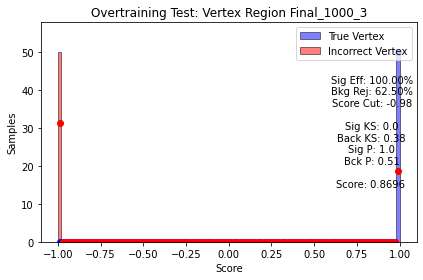

KS Signal:     0.0 with P value: 1.0
KS BackGround: 0.375 with P value: 0.5076923076923076
Final10003 & 86.96 & 0.0 (p=1.0) & 0.38 (p=0.51)


In [23]:
import PandoraBDT
reload (PandoraBDT)
from PandoraBDT import *

parameters = {
  'ClassNames': ['True Vertex', 'Incorrect Vertex'],
  'SignalDefinition': [1, 0],
  'PlotColors': ['b', 'r'],
  'nBins': 100,
  'PlotStep': 1.0,
  'OptimalBinCut': 0,
  'OptimalScoreCut': 0.0,
  'nTrees': 100,
  'TreeDepth': 3
}

FindOptimalSignificanceCut(baseBDT, xTest, yTest, parameters)
PlotBdtScores2(baseBDT, xTest, yTest, xTrain, yTrain, 'Vertex Region ' + version, parameters, plotsDir, True)